# Dataset

In [2]:
import sys
sys.path.append('/Users/jack/git_repos/fastai_dev/dev/')

from local.torch_basics import *
from local.test import *
from local.layers import *
from local.data.all import *
from local.data.block import *
from local.optimizer import *
from local.learner import *
from local.metrics import *
from local.callback.all import *
from local.vision.all import *

## Images
The 'train' directory contains jpg image files.

In [3]:
items = get_image_files('train')

In [4]:
items

(#5546) [train/8734e73.jpg,train/0ece863.jpg,train/c54d2ef.jpg,train/3124a1e.jpg,train/a438b48.jpg,train/94aff90.jpg,train/eb8ac47.jpg,train/e298926.jpg,train/4c60d33.jpg,train/d84a0d8.jpg...]

Let's look at one of them in its original size.

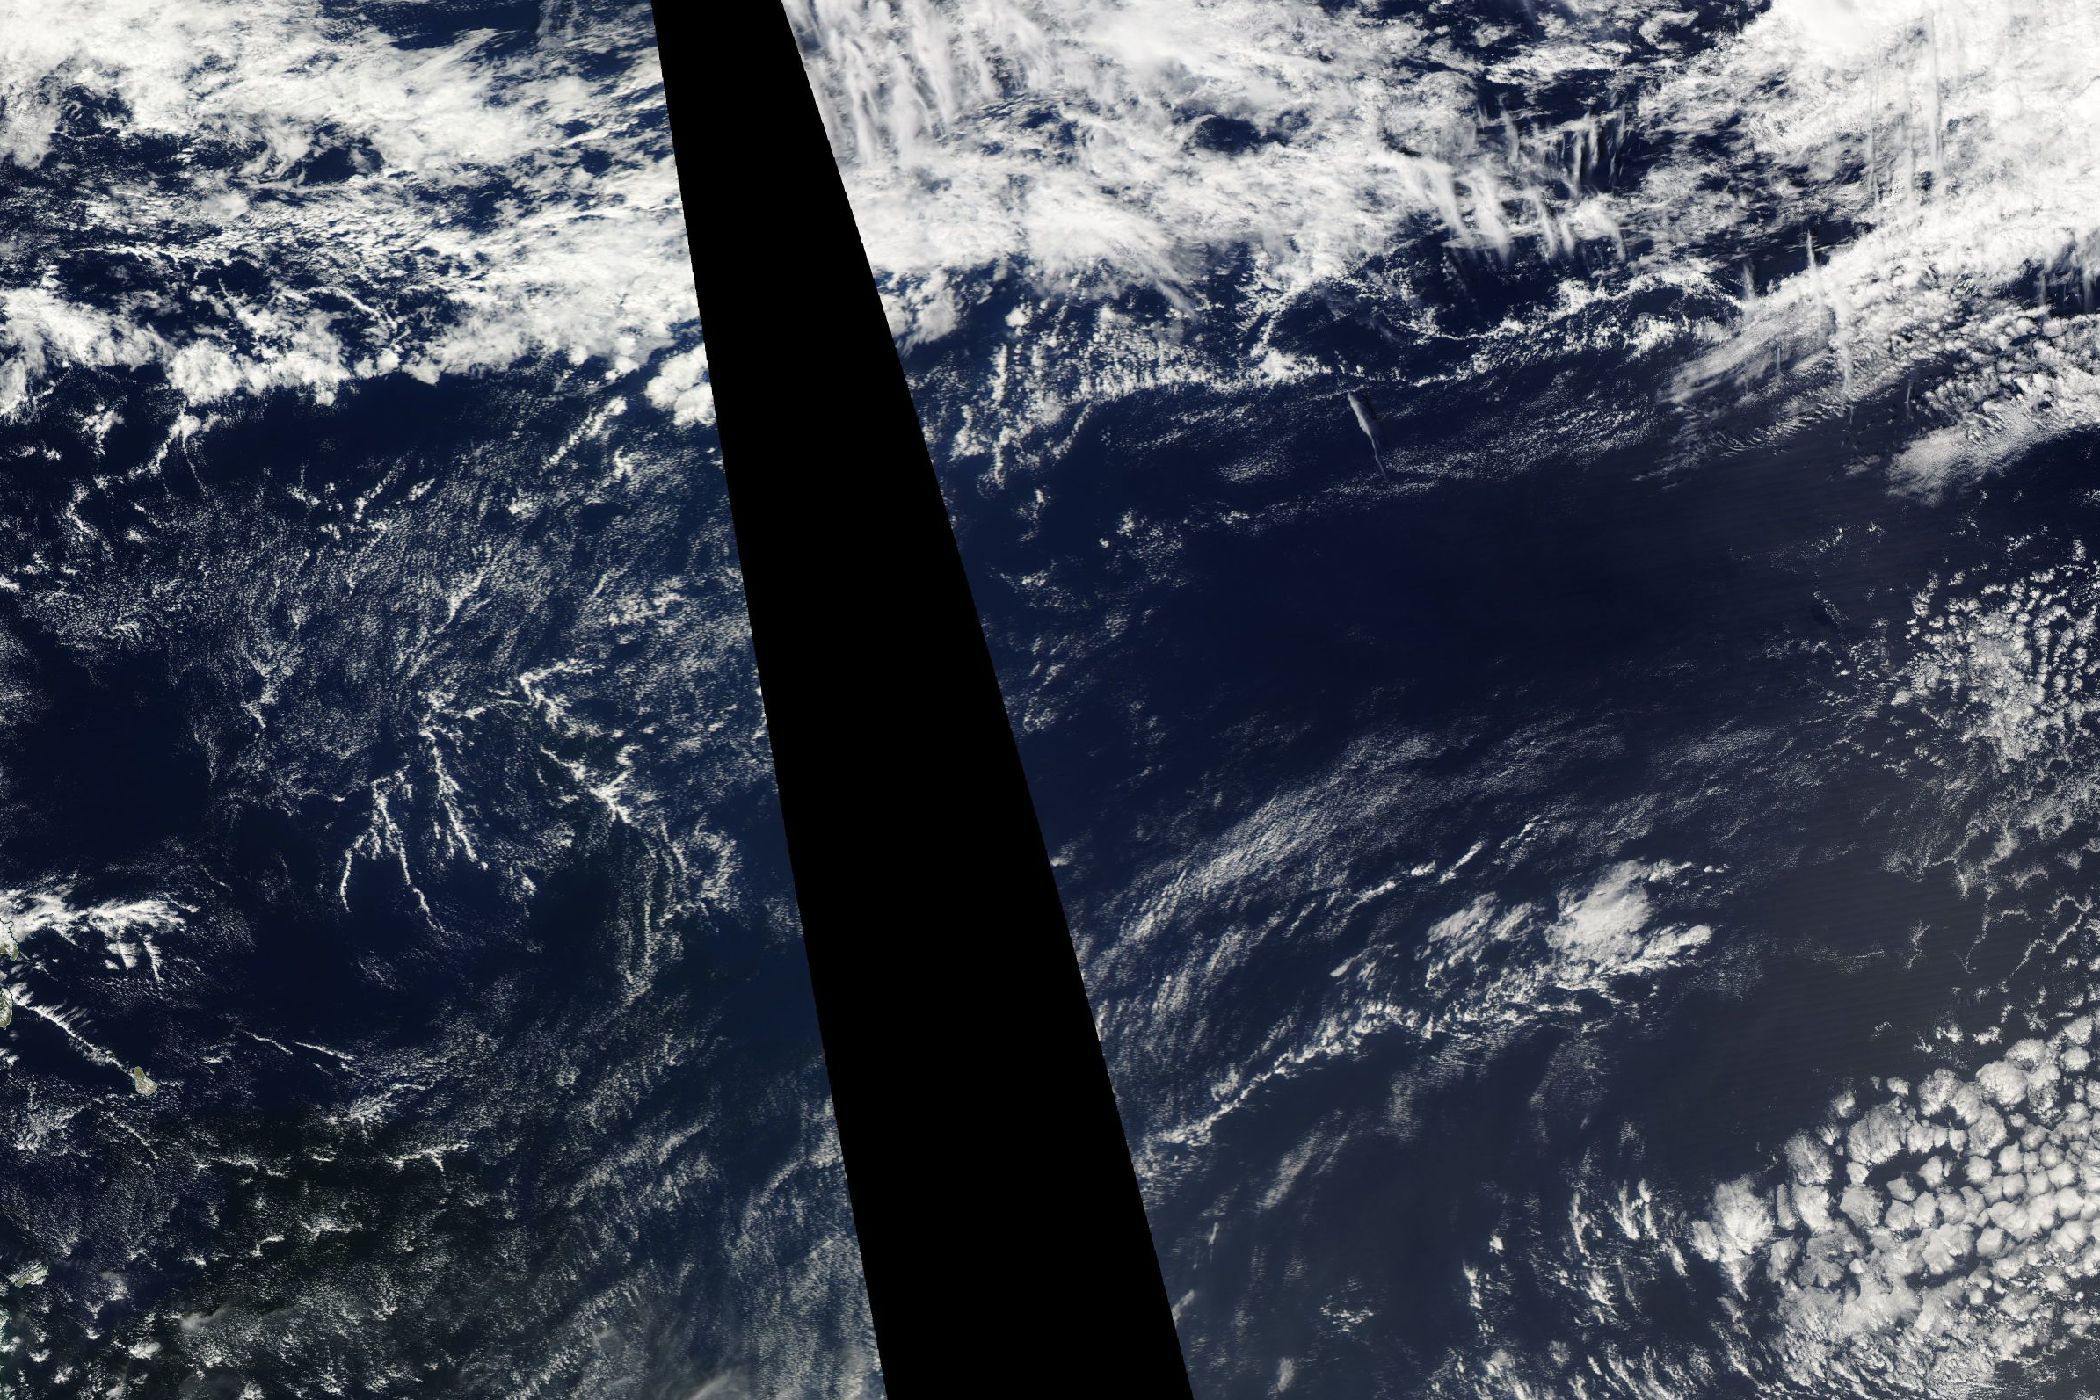

In [5]:
PILImage.create(items[1034])

## Annotation info

In [6]:
df = pd.read_csv('train.csv') 

In [7]:
df.head()

Image_Label  \
0    0011165.jpg_Fish   
1  0011165.jpg_Flower   
2  0011165.jpg_Gravel   
3   0011165.jpg_Sugar   
4    002be4f.jpg_Fish   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             EncodedPixels  
0  264918 937 266318 937 267718 937 269118 937 270518 937 271918 937 273318 937 274718 937 276118 937 277518 937 278918 937 280318 937 281718 937 283118 937 284518 937 285918 937 287318 937 288718 937 290118 937 291518 937 292918 937 294318 937 295718 937 297118 937 298518 937 299918 937 301318 937 302718 937 304118 937 305518 937 306918 937 308318 937 309718 937 311118 937 312518 937 313918 937 315318 937 316718 937 318118 937 319518 937 320918 937 322318 937 323718 937 325118 937 326518 937 327918 937 329318 937 330718 937 332118 937 333518 937 334918 937 336318 937 337718 937 339118 937 34...  
1  1355565 1002 1356965 1002 1358365 1002 1359765 1002 1361165 1002 1362565 1002 1363965 1002 1365365 1002 1366765 1002 1368165 1002 1369565 1002 1370965 1002 1372365 1002 1373765 1002 1375165 1002 1376565 1002 1377965 1002 1379365 1002 1380765 1002 1382165 1002 1383565 1002 1384965 1002 1386365 1002 1387765 1002 1389165 1002 1390565 1002 1391965 1002 1393365 1002 1394765 1002 1396165 1002 1397565 1002 1398965 1002 1400365 1002 1401765 1002 1403165 1002 1404565 1002 1405965 1002 1407365 1002 1408765 1002 1410165 1002 1411565 1002 1412965 1002 1414365 1002 1415765 1002 1417165 1002 1418565 100...  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      NaN  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      NaN  
4  233813 878 235213 878 236613 878 238010 881 239410 881 240810 881 242210 881 243610 881 245010 881 246410 881 247810 881 249210 881 250610 881 252010 881 253410 881 254810 881 256210 881 257610 881 259010 881 260410 881 261810 881 263210 881 264610 881 266010 881 267410 881 268810 881 270210 881 271610 881 273010 881 274410 881 275810 881 277210 881 278610 881 280010 881 281410 881 282810 881 284210 881 285610 881 287010 881 288410 881 289810 881 291210 881 292610 881 294010 881 295410 881 296810 881 298210 881 299610 881 301010 881 302410 881 303810 881 305210 881 306610 881 308010 881 30...

Extract image id and cloud type, and put them into separate columns.  Replace empty `EncodedPixels` with empty string.  Drop the original `Image_Label` column.

In [8]:
df['Image'] = df.Image_Label.apply(lambda o: o.split('.')[0])
df['Label'] = df.Image_Label.apply(lambda o: o.split('_')[1].lower())
df.drop('Image_Label', axis=1, inplace=True)
df = df[['Image', 'Label', 'EncodedPixels']]

df.EncodedPixels.fillna('', inplace=True)

In [9]:
df.head()

Image   Label  \
0  0011165    fish   
1  0011165  flower   
2  0011165  gravel   
3  0011165   sugar   
4  002be4f    fish   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             EncodedPixels  
0  264918 937 266318 937 267718 937 269118 937 270518 937 271918 937 273318 937 274718 937 276118 937 277518 937 278918 937 280318 937 281718 937 283118 937 284518 937 285918 937 287318 937 288718 937 290118 937 291518 937 292918 937 294318 937 295718 937 297118 937 298518 937 299918 937 301318 937 302718 937 304118 937 305518 937 306918 937 308318 937 309718 937 311118 937 312518 937 313918 937 315318 937 316718 937 318118 937 319518 937 320918 937 322318 937 323718 937 325118 937 326518 937 327918 937 329318 937 330718 937 332118 937 333518 937 334918 937 336318 937 337718 937 339118 937 34...  
1  1355565 1002 1356965 1002 1358365 1002 1359765 1002 1361165 1002 1362565 1002 1363965 1002 1365365 1002 1366765 1002 1368165 1002 1369565 1002 1370965 1002 1372365 1002 1373765 1002 1375165 1002 1376565 1002 1377965 1002 1379365 1002 1380765 1002 1382165 1002 1383565 1002 1384965 1002 1386365 1002 1387765 1002 1389165 1002 1390565 1002 1391965 1002 1393365 1002 1394765 1002 1396165 1002 1397565 1002 1398965 1002 1400365 1002 1401765 1002 1403165 1002 1404565 1002 1405965 1002 1407365 1002 1408765 1002 1410165 1002 1411565 1002 1412965 1002 1414365 1002 1415765 1002 1417165 1002 1418565 100...  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
4  233813 878 235213 878 236613 878 238010 881 239410 881 240810 881 242210 881 243610 881 245010 881 246410 881 247810 881 249210 881 250610 881 252010 881 253410 881 254810 881 256210 881 257610 881 259010 881 260410 881 261810 881 263210 881 264610 881 266010 881 267410 881 268810 881 270210 881 271610 881 273010 881 274410 881 275810 881 277210 881 278610 881 280010 881 281410 881 282810 881 284210 881 285610 881 287010 881 288410 881 289810 881 291210 881 292610 881 294010 881 295410 881 296810 881 298210 881 299610 881 301010 881 302410 881 303810 881 305210 881 306610 881 308010 881 30...

Let's copy-n-paste over function for decoding the *run-length pixel encoding* from somebody's notebook:

In [10]:
def rle_decode(mask_rle: str = '', shape: tuple = (1400, 2100)):
    '''
    Decode rle encoded mask.
    
    :param mask_rle: run-length as string formatted (start length)
    :param shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    
    Copied from https://www.kaggle.com/artgor/segmentation-in-pytorch-using-convenient-tools
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')

In [11]:
items = L(r for i, r in df.iterrows())

In [12]:
class ImgFilename(Transform):
    "Dataframe row --> file path to image"
    def __init__(self, path:Path): self.path = path
    def encodes(self, o): return Path(self.path)/f'{o.Image}.jpg'
    
def labeller(o): return o.Label

class MaskTfm(Transform):
    'Dataframe row --> PIL mask'
    def __init__(self, imgfn:ImgFilename): self.imgfn = imgfn       
    def encodes(self, o):
        shape = PILImage.create(self.imgfn(o)).shape
        return PILMask.create(rle_decode(o.EncodedPixels, shape=shape))

class CloudImageLabelMask(Tuple):
    'Tuple(image, label, mask)'
    def show(self, ctx=None, **kwargs):
        img, label, mask = self
        if ctx is None: _, ctx = plt.subplots()
        show_titled_image((img, label), ctx=ctx, **kwargs)
        mask.show(ctx=ctx, **kwargs)

class CloudTfm(Transform):
    'dataframe row --> tuple(image, label, mask)'
    def __init__(self, imgfn:ImgFilename, labeller):
        self.img_tfm = Pipeline([imgfn, PILImage.create])
        self.labeller = labeller
        self.mask_tfm = MaskTfm(imgfn)       
    def encodes(self, o): return self.img_tfm(o), self.labeller(o), self.mask_tfm(o)
    def decodes(self, o): return CloudImageLabelMask(o)

In [13]:
imgfn = ImgFilename('train/')

In [14]:
cloud = CloudTfm(imgfn, labeller)

In [15]:
img, label, mask = cloud(items[1112])
type(img), type(label), type(mask)

(local.vision.core.PILImage, str, local.vision.core.PILMask)

In [16]:
dec = cloud.decode((img, label, mask))

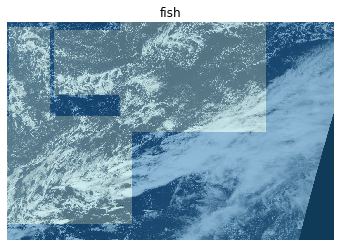

In [17]:
dec.show()

There's *fish* in this image.

Let's look at all four cloud types for a given image

Image: 034a383


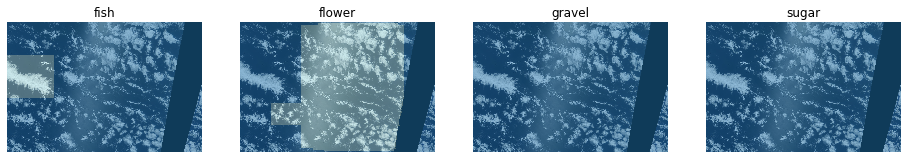

In [18]:
img_id = items[231].Image
print(f'Image: {img_id}')

its = L(r for _, r in df[df.Image == img_id].iterrows())

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for ax, o in zip(axs.flatten(), its): 
    t = cloud(o)
    cloud.decode(t).show(ctx=ax)

Image: 0499a68


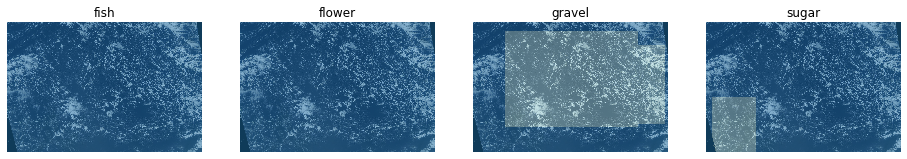

In [19]:
img_id = items[345].Image
print(f'Image: {img_id}')

its = L(r for _, r in df[df.Image == img_id].iterrows())

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for ax, o in zip(axs.flatten(), its): 
    t = cloud(o)
    cloud.decode(t).show(ctx=ax)

Image: 0035239


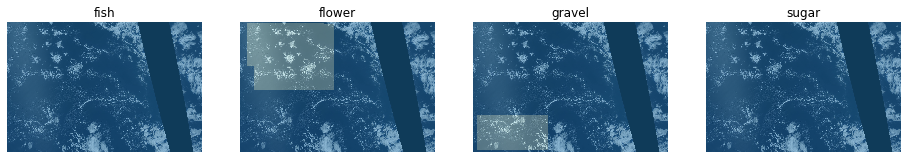

In [20]:
img_id = items[12].Image
print(f'Image: {img_id}')

its = L(r for _, r in df[df.Image == img_id].iterrows())

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for ax, o in zip(axs.flatten(), its): 
    t = cloud(o)
    cloud.decode(t).show(ctx=ax)

## Some numbers

In [68]:
print('The number of unique images:', df.Image.nunique())

The number of unique images: 5546


In [69]:
df.Label.unique()

array(['fish', 'flower', 'gravel', 'sugar'], dtype=object)

In [91]:
def nimages_with_cloud(cloudtype='fish'):
    '''
    Returns the number of images containing `cloudtype` cloud
    '''
    return df[df.Label==cloudtype].EncodedPixels.apply(lambda x: 1 if x else 0).sum()

In [92]:
for n in ['fish', 'flower', 'gravel', 'sugar']:
    print(f'Number of images with {n:>8s} cloud type:',
          nimages_with_cloud(n))

Number of images with     fish cloud type: 2781
Number of images with   flower cloud type: 2365
Number of images with   gravel cloud type: 2939
Number of images with    sugar cloud type: 3751


# Fin